<div>
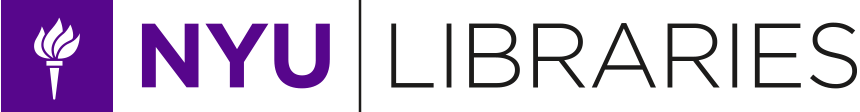
</div>

# Intermediate Python

**Rijul Nandy, Shreemayi Sonti, and Nicholas Wolf, NYU Data Services**

Rijuls's ORCID: 0000-0000-0000-0000 | Nick's ORCID: 0000-0001-5512-6151

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License.

## Overview

This session is designed to be a followup to the Data Services [Intro to Python](https://guides.nyu.edu/ds_class_descriptions/Introduction-to-Python). It picks up where that lesson leaves off by again focusing on practical research applications for Python, but introducing more advanced versions of previous concepts such as functions and basic objects such as lists and dictionaries. It also introduces new concepts such as Python custom classes.

Goals of this class include:

 - Build on Intro to Python topics with some new skills:
  - Build out knowlege of fundamental Python objects such as functions and lists/sets/tuples
  - Error handling
  - List and dictionary comprehensions
  - Various shortcuts when using lists
  - Basic starter on writing custom classes


## Class Materials

**Lesson Plan**

This notebook is available at [hosted notebook URL](). You can download the file by cloning the notebook as follows:

<code>git clone https://github.com/NYU-DataServices/IntermediatePython.git</code>

**Class JupyterHub**

You can access this lesson plan to run the code live at [https://tutorials-1.rcnyu.org](https://tutorials-1.rcnyu.org).


# 1. More on Functions

### Fine-tuning input parameters

An initial introduction to user-written functions talked about their use for re-usable short code blocks that perform certain tasks, and that a function may have one or more input parameters: 

In [3]:
def testFunc1(input_param):
    return input_param + 1

testFunc1(5)

6

Such functions don't consider any identity to those input parameters, the function rlies on the order they are passedL

In [4]:
def stateColor(red_input, blue_input):
    print("Fire is ", red_input)
    print("Water is ", blue_input)
    
stateColor("red", "blue")   # desired result

Fire is  red
Water is  blue


In [5]:
stateColor("blue", "red") # the function can't identify inputs and sort them into the right order

Fire is  blue
Water is  red


In [6]:
stateColor("red")  # furthermore, you have to have both input paramters every time

TypeError: stateColor() missing 1 required positional argument: 'blue_input'

In other words, functions by default rely on <em>position</em> of input parameters to assign the variables used in the function's code block. But what if you want to define input parameters explicitly? Or what if there are times when an input parameter is desired to be omitted? For this, we can use keyword arguments, which require you to use an "=" to explain the type of input you are using. We also set defaults in case no inputs are given:

In [12]:
def testFunc1(key1 = 2, key2 = 3):
    return key1 + key2


In [13]:
testFunc1(key1 = 1, key2 = 4)  # explicitly define the two parameters

5

In [14]:
testFunc1()  # the pre-defined defaults are used

5

In [15]:
testFunc1(key1 = 10)  # the first parameter is defined, the second one is omitted and default will be used

13

You can also mix and match:

In [16]:
def testFunc2(key1, key2, key3 = 2):
    return key1 + key2 + key3

In [18]:
print(testFunc2(1, 1)) #Purely Positional

print(testFunc2(key1 = 1, key2 = 1)) #Purely Keyword

print(testFunc2(1, 1, 1)) #Purely Positional 

print(testFunc2(1, key2 = 8)) #Positional and Keyword 

4
4
3
11


### Lambda functions

Python lambdas are anonymous functions typically defined only for the purpose of an immediate use, and designed to do a single short calculation or work step. They are particularly convenient when used in conjunction with other built-in Python functions that are designed to take a second function as an input parameter and apply it to an array of elements passed as a second parameter.

First, we can look at how to define a lambda function:

In [64]:
small_function = lambda x: x+1

small_function(2)

3

One way to think about the syntax of a lambda function statement <code>lambda x: x+1</code> is "I am defining here a function called lambda involving a single input parameter x such that for every input x, the return will be x + 1."

Note that we can have multiple parameters as an input, but you can only have one expression (i.e. action to perform on the parameters) following the colon. Unlike a regular defined function, think of a lambda as a single-liner function defined exclusively locally.

In [65]:
small_function2 = lambda x, y: x + y

small_function2("Hello ", "world!")

'Hello world!'

So far, this won't seem terribly useful. After all, we can easily do a similar process using a non-lambda function:

In [66]:
def small_function3(x, y):
    return x + y

small_function3("Hello ", "world!")

'Hello world!'

But a big payoff happens for writing shorter code when lambda is used in conjunction with Python functions like <code>map()</code>. The function <code>map()</code> takes as its first parameter a function, and the second parameter an array of elements, and it applies the input function in turn to each element of the second parameter, constructing a map object of return values that can then be cast into a list.

If we use lambda here instead of defining a full function, we can quickly use that lambda function for the purposes of that single line:

In [70]:
map_lambda = map(lambda x: 2**x, [0, 1, 2, 3])  # lambda function that raises 2 to the input as exponent

list(map_lambda)

[1, 2, 4, 8]

Or, more concise:

In [71]:
list(map(lambda x: 2**x, [0, 1, 2, 3]))

[1, 2, 4, 8]

As opposed to:

In [75]:
def exp_2(x):
    return 2**x

print(list(map(exp_2, [0, 1, 2, 3])))

# Or, even less concise:
input_list = [0, 1, 2, 3]
output_list = []

for i in input_list:
    output_list.append(2**i)
    
output_list


[1, 2, 4, 8]


[1, 2, 4, 8]

# 2. Lists vs Sets vs Tuples

Python offers multiple data structures to store data. Lists, sets and tuples are among the most frequently used ones. 

Lists, sets, and tuples follow these principles:

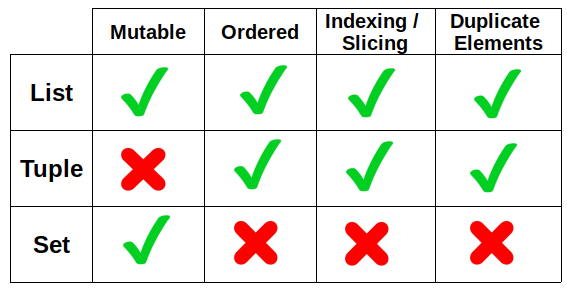

Let's look at each of these features.

### Mutability

Lists and sets are mutable in nature, meaning that the elements contained within them can be changed after creating and defining that list or set. 

In [34]:
list1 = [1,2,3,4,5,'a']

print(list1)

list1[0] = 6   # setting a new value for the first element of the list

print(list1)

list1.append(6)  # adding a new element to the end of a list

print(list1)

[1, 2, 3, 4, 5, 'a']
[6, 2, 3, 4, 5, 'a']
[6, 2, 3, 4, 5, 'a', 6]


Sets are mutable as well. You can update the data after defining it:

In [36]:
set1 = {1,2,3,4,5}

print(set1)

set2 = {6,7}

set1.update(set2)  # using .update() to concatenate a first set with a second

print(set1)

set1.add(8)   # using .add() to append a value to the end of a set

print(set1)

set1.remove(6)  # you can also remove by specifying an element by naming it (works because sets have unique elements)

print(set1)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 6, 7}
{1, 2, 3, 4, 5, 6, 7, 8}
{1, 2, 3, 4, 5, 7, 8}


A tuple is not mutable. This adds a level of security to it and it can be used to store values that you don't want to change over the course of your code: 

In [38]:
tuple1 = (1, 2, 3, 4, 5,'a')

tuple1.update(1,2,3)  # error, you can't update a tuple

AttributeError: 'tuple' object has no attribute 'update'

In [40]:
tuple1[0] = 7  # same, you can't update the tuple by this method either

TypeError: 'tuple' object does not support item assignment

In [41]:
tuple1 = (1,2,3,4)

tuple1.append(5)

AttributeError: 'tuple' object has no attribute 'append'

Similarly, this will return an error as well. However a mutable object within an unmutable structure can be updated as follows:

In [43]:
#mutable items within a tuple

tuple2 = ([1,3], 'a', 'b', 8)

print(tuple2)

tuple2[0][0] = 99

print(tuple2)

([1, 3], 'a', 'b', 8)
([99, 3], 'a', 'b', 8)


### Ordering, Indexing and Slicing

A list has an order in which the elements are stored. Hence the elements can then be called using the index. We can also slice the indexes to generate multiple elements from the list. This is review from introductory Python:

In [44]:
text = "Hello World!"

list2 = list(text)

print(list2[0])  # accessing element by index location

print(list2[:2]) # slicing using index location spans

H
['H', 'e']


A set has no order and thus cannot be indexed or sliced. 

In [45]:
set2 = set(text)
print(set2)

{' ', 'd', 'l', 'r', 'H', 'W', 'e', '!', 'o'}


In [46]:
print(set2[:2])

TypeError: 'set' object is not subscriptable

In [ ]:
print(set2[0])

TypeError: ignored

A tuple, however, follows the same rules as the list and has an ordered indexing system in-built, such that the elements can be called using the indexes. 

In [50]:
tuple3 = tuple(text)
print(tuple3[4])
print(tuple3[:2])

o
('H', 'e')


### Duplicate Elements

Only sets do not permit duplicate elements.

In [76]:
text = "NYU University"

print(list(text))

print(tuple(text))

print(set(text))  # Note in the output that there is only one "i" and one "U"

['N', 'Y', 'U', ' ', 'U', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y']
('N', 'Y', 'U', ' ', 'U', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y')
{' ', 'U', 'r', 's', 'y', 'Y', 'e', 't', 'N', 'v', 'n', 'i'}


# 3. Try/Except Error Handling

Sometimes there are situations where you expect there will be cases where a line of code might fail and you need to account for that failure without causing the entire code to fail. In other cases, you want to debug a line of code and need it to run without failing in order to identify the error.

The following code shows us the syntax for the 'try'-'except' functionalities which python uses for error handling.

In [25]:
def testFunc3():
    try:
        print(var1)

    except:
        print("There was an error!")
        return None

    print("Out of the block")

In [26]:
testFunc3()

There was an error!


A line-by-line explanation:

<b>try:</b> Python will attempt to run this code block. An error may or may not occur.

<b>except:</b> If an error does occur, then this block will run instead. Error handling can happen in this block.

Note that the final line of the function, a <code>print("Out of the block")</code>, is not executed because the except block contained a return statement and once the return happens, the function's work is done. But you may also want a portion of your code to run regardless of how the try/except portion plays out. For this, you can use <b>finally</b>:


In [29]:
def testFunc4():
    try:
        print(var1)

    except:
        print("There was an error!")
        return None

    finally:
        print("Out of the block")

In [30]:
testFunc4()

There was an error!
Out of the block


# 4. Comprehensions

Comprehensions can be a compact way to instantiate an object such as a list while simultaneously controlling its membership. It can also replace a multi-line "for loop" with a single-line means of performing an operation on each element in an array object (list, dictionary). Let's start with lists:

## List Comprehension

As learned previously, we can iterate through a structure such as a list to access every element stored in the structure:

In [53]:
boroughs = ["bronx", "brooklyn", "statenisland", "manhattan", "queens"]
newlist = [] # container for a filtered list

for borough in boroughs:
    if "o" in borough:
        newlist.append(borough)

print(newlist) #prints every borough that has an "o" in it

['bronx', 'brooklyn']


But we can do this more compactly using an inline list comprehension:

In [ ]:
boroughs = ["bronx", "brooklyn", "statenisland", "manhattan", "queens"]

newlist = [b for b in boroughs if "o" in b]

print(newlist)

['bronx', 'brooklyn']


#### Additional examples for list comprehension

In [ ]:
newlist = [b for b in boroughs if b not in ["manhattan","bronx"]]

print(newlist)

['brooklyn', 'statenisland', 'queens']


In [ ]:
newlist = [num for num in range(10) if num < 5]

print(newlist)

[0, 1, 2, 3, 4]


In [55]:
newlist = [num + 100 for num in range(10) if num == 5]  # modifying the resulting elment

print(newlist)

[105]


## Challenge 1: Given a list of numbers, remove all odd numbers from the list:

In [ ]:
numbers = [3,5,45,97,32,22,10,19,39,43]

In [145]:
#Fill in your answer here:

## Dictionary Comprehension

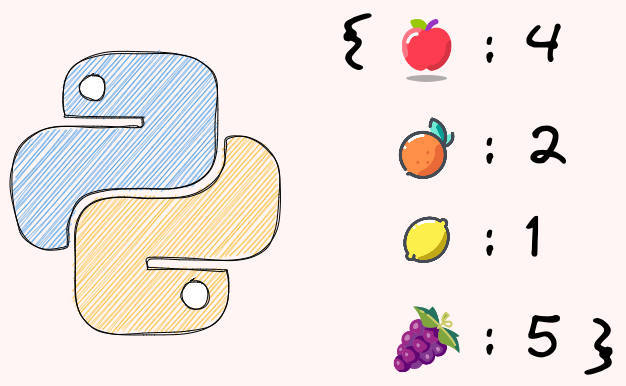

\<\<Image credit needed \>\>

#### Quick Review

Dictionaries provide a way to form custom 'key'-'value' pairs. While lists define the indexes in a pre-built index-based fashion, dictionaries allow you to have your own indexing system.

In [57]:
dict1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [ ]:
print(dict1.keys()) # access the dictionary keys only
print(dict1.values()) # access the dictionary values only

dict_keys(['a', 'b', 'c', 'd'])
dict_values([1, 2, 3, 4])


In [ ]:
print(dict1.items())  # access both keys and values as an array of paired two-element items (key, value)

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4)])


But we can also deploy a dictionary comprehension to work through a dictionary in a single line without using a for loop. Note the curly brackets denoting a dictionary (as opposed to the square brackets in a list comprehension):

In [59]:
dict1_v2 = {key:"orange" for key in dict1.keys()}  # example that focuses just on the dictionary's keys

print(dict1_v2)

{'a': 'orange', 'b': 'orange', 'c': 'orange', 'd': 'orange'}


In [61]:
dict1_v3 = {value:key for key,value in dict1.items()}  # a quick way to swap keys for values!

print(dict1_v3)

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}


In [58]:
dict1_v4 = {key*2:value for key,value in dict1.items()}

print(dict1_v4)

{'aa': 1, 'bb': 2, 'cc': 3, 'dd': 4}


### Manipulating the structures

A dictionary comprehension doesn't necessarily have to be altering a previously created dictionary. We can use it to create a dictionary derived from the contents of an array such as a list or some other group of elements. Here are two examples, one showing how this would be done with a more verbose for loop, and one as a dictionary comprehension.

Here, we are building a list of even numbers into a dictionary consisting of their squares:

In [62]:
numbers = range(10)
new_dict1 = {}

# Add even values only from original list to 'new_dict1' using for loop
for num in numbers:
    if num%2==0:    # this is the modulo. We check if the remainder of a number devided by 2 is 0 (if so, it is even)
        new_dict1[num] = num**2

print(new_dict1)

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}


In [63]:
new_dict2 = {num:num**2 for num in numbers if num%2==0}

print(new_dict2)

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}


## Challenge 2: Add the string "letter" to the key and the value 1000 to the value in the dictionary defined below:

In [ ]:
a = {"a":10, "b":20, "c":30}

Output should be: {‘Letter a’: 1010, ‘Letter b’: 1020, ‘Letter c’: 1030}

In [146]:
# Fill in answer here

# 5. More on List and Dictionary Tools

## Dictionary unpacking using ** 

The ** operator is used to "unpack" dictionary, used when we want to immediately access all values as a set of parameters. It is especially useful for sending those values to a function while retaining the dictionary's keys as the name of the input parameters:

In [98]:
def simple_funct(k1, k2, k3):
    print(k2, k1, k3)           # Note that we switch the order; inputs are bound to variable names

In [99]:
d = {'k1':10, 'k2':20, 'k3':30} #dictionary definition

simple_funct(**d) # calling the function by unpacking the dictionary; keys are linked to variable names

20 10 30


We can also use the ** to unpack dictionaries and merge them in a new dict object.

In [1]:
d = {'k1':10, 'k2':20, 'k3':30}
new = {'k0':0, **d}
print(new) 

{'k0': 0, 'k1': 10, 'k2': 20, 'k3': 30}


## Enumerate, sorted, reverse

Often, when dealing with iterators, we also get need to keep a count of iterations. Python eases the programmer's task by providing a built-in function enumerate() for this task. Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() function.

The syntax involves an input iterable such as a list, tuple, or string (which will be iterated as an array of its characters), and an index start for the enumeration (default is 0):

<code>enumerate(input_iterable, start=0)</code>

In [114]:
enum_item1 = ["eat", "sleep", "repeat"]
enum_item2 = "geek"

Enumerating the two iterables formed above

In [115]:
print(list(enumerate(enum_item1)))

print(list(enumerate(enum_item2)))

[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(0, 'g'), (1, 'e'), (2, 'e'), (3, 'k')]


We can access the enumeration's count and the element separately by accessing each of the 2 elements in the resulting tuple:

In [116]:
for count, ele in enumerate(enum_item1):
    print(count)
    print(ele)

0
eat
1
sleep
2
repeat


### Reverse and sorted

Recall that lists are mutable. We can therefore change them "in place" tools to perform tasks like sorting or reversing them. They do not need to be reassigned to a new variable when doing this--the list's order is simply changed:  

In [117]:
enum_item1.reverse()

enum_item1

['repeat', 'sleep', 'eat']

In [119]:
enum_item1.sort()   # Sorts elements by ASCII order, in this case initial string characters are considered
 
enum_item1

['eat', 'repeat', 'sleep']

See that the list elements are now sorted alphabetically.

## Using a list as a stack vs. a queue

In computing, a stack works on the principle of “last-in, first-out,” much like a stack of books for which the topmost book can easily be accessed, but the book on the bottom cannot.

The in-built functions in Python related to managing such an approach with lists make the code short and simple.

To add an item to the top (here, end) of the list (or stack), i.e., to "push" an item, we use the append() function. To pop out and access an element we use pop() function. Both result in modifications to the membership of the list.

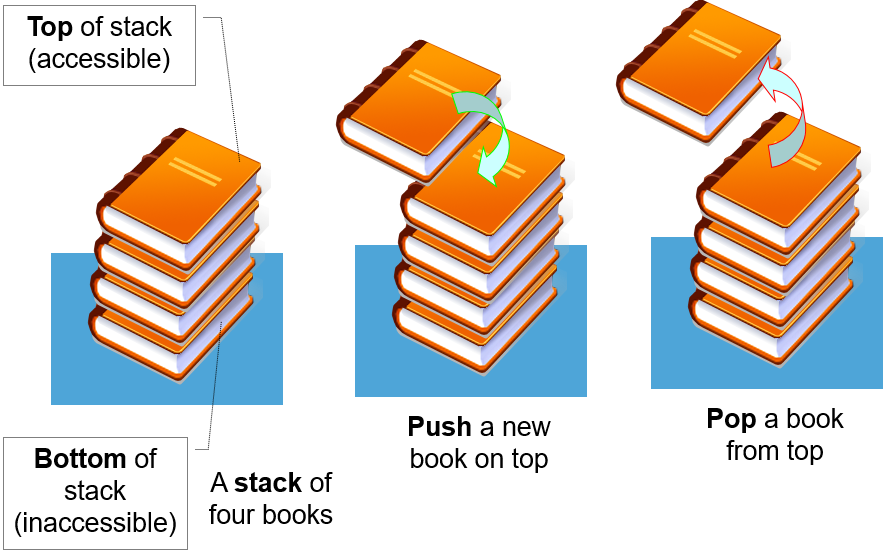

In [124]:
stack = ["Becky", "Tom", "Anthony"]
print("Initially the stack looks like:",stack)

stack.append("Leo")
stack.append("Ronald")

print("After two appends, the stack looks like: ", stack)

Initially the stack looks like: ['Becky', 'Tom', 'Anthony']
After two appends, the stack looks like:  ['Becky', 'Tom', 'Anthony', 'Leo', 'Ronald']


In [125]:
# pop() Removes the last item
print("The first pop removes",stack.pop(),"from the stack")
print("Now the stack looks like:",stack)

The first pop removes Ronald from the stack
Now the stack looks like: ['Becky', 'Tom', 'Anthony', 'Leo']


In [126]:
# Removes the last item
print("The second pop removes",stack.pop(),"from the stack")
print()
print("Now the stack looks like:",stack)

The second pop removes Leo from the stack

Now the stack looks like: ['Becky', 'Tom', 'Anthony']


Alternatively, we can treat out list like a queue. A queue works on the principle of “first-in, first-out”. Below is list implementation of queue. We use pop(0), designating the front or beginning of the list, to remove the first item rather than the top/rear.

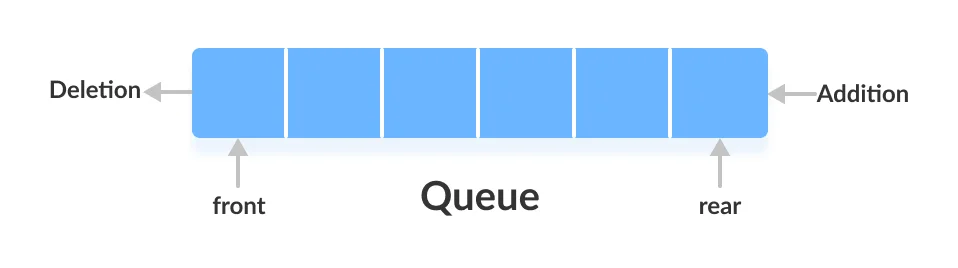

In [130]:
queue = ["Becky", "Tom", "Anthony"]
queue.append("Leo")
queue.append("Ronald")
print("Initially the queue looks like:", queue)

Initially the queue looks like: ['Becky', 'Tom', 'Anthony', 'Leo', 'Ronald']


In [131]:
# pop(0) Removes the first item
print("The first pop removes", queue.pop(0),"from the queue")
print("Now the queue looks like:", queue)

The first pop removes Becky from the queue
Now the queue looks like: ['Tom', 'Anthony', 'Leo', 'Ronald']


In [132]:
# Removes the first item
print("The second pop removes",queue.pop(0),"from the queue")
print()
print("Now the queue looks like:",queue)

The second pop removes Tom from the queue

Now the queue looks like: ['Anthony', 'Leo', 'Ronald']


## A helper function called zip()

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together, etc.



In [136]:
a = ["John", "Charles", "Mike", "Jason"]
b = ["Jenny", "Christy", "Monica", "Vicky"]

list(zip(a, b))

[('John', 'Jenny'),
 ('Charles', 'Christy'),
 ('Mike', 'Monica'),
 ('Jason', 'Vicky')]

If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator. Items in the longer array that exceed the length of the other array will not be used.


In [138]:
c = ("Ming", "Maria", "Bill")       # Works with tuples as well
d = ("Ali", "Sara", "Art", "Troy")

list(zip(c, d))

[('Ming', 'Ali'), ('Maria', 'Sara'), ('Bill', 'Art')]

We can start piecing together various options for quickly building data-holding objects:

In [139]:
player_numbers = [7, 9, 10]
player_names = ['Cristiano Ronaldo', 'Gareth Bale', 'Lionel Messi']

# Approach 1: zip() plus dictionary comprehension
player_data = { number: name for number, name in zip(player_numbers, player_names) }
print(player_data)

# Approach 2: zip() plus dict()
player_data = dict(zip(player_numbers, player_names))
print(player_data)

{7: 'Cristiano Ronaldo', 9: 'Gareth Bale', 10: 'Lionel Messi'}
{7: 'Cristiano Ronaldo', 9: 'Gareth Bale', 10: 'Lionel Messi'}


# 6. Building Strings Dynamically

A common need in workflows is to dynamically modify text using dropped in variables. Two common ways to do this is to use .format() and (new in Python 3), Fstrings. These replace older methods that involved designating string variables using the % sign.

First, using .format():

In [140]:
var1 = 'Washington Square'

text_passage = "NYU is located on {}. This is close to Greenwich Village.".format(var1)

text_passage

'NYU is located on Washington Square. This is close to Greenwich Village.'

Alternatively, using a structure called Fstrings:

In [141]:
print(f"One of the best-known locations in New York is {var1}.")

One of the best-known locations in New York is Washington Square.


You can also call functions within the Fstrings:

In [142]:
def to_lowercase(input_text):
    return input_text.lower()

name = "Funny Man"
print(f"{to_lowercase(name)} is funny.")

funny man is funny.


# 7. Operators and orders: PEMDAS

The order Python operators are executed in is governed by the operator precedence. Operators with higher precedence are executed before those with lower precedence, but operators have matching precedence when they are in the same group.

PEMDAS is P- Parenthesis, E-Exponent, MD- (multiplication division), AS (Addition Subtraction).

Multiplication and division have the same precedence, and the same goes for addition and subtraction. When a division operator appears before multiplication, division goes first.

For a full breakdown of all operations, see the following table: [https://www.programiz.com/python-programming/precedence-associativity](https://www.programiz.com/python-programming/precedence-associativity)

In [144]:
7 + 8*7//4 - 5

16

This is equivalent to: <code>((7 + ((8*7)//4)) - 5)</code>

# 8. Custom Classes in Python

There are times in your code when you will want to perform an extended analysis or data manipulation where you will want to define not a tool or action, but rather a "type of thing" that has certain characteristics and capabilities.

Imagine, for example, that your data involves archaelogical objects, each with certain characteristics such as name, location found, time period it was created, and material. Let's say it also has a distance it was found from another object, based on the coordinates of its find location, and that we want to define a means to calculate that distance for any object.

We could model this like this using Python's custom classes. Note that the convention in Python is to capitalize the names of classes, and lower case the names of functions:

In [151]:
class ArchObject:
    def __init__(self, name, location, time_period, material):
        self.name = name
        self.loc = location
        self.time = time_period
        self.mat = material


Python is entirely composed of classes. Even fundamentals like a list is a class, with certain attributes. We have now created a new class called ArchObject. Then we defined what happens when we create one (instatiate it), explained when we add this <code>def __init__()</code> part.

Now we can instantiate a new ArchObject and assign it a variable:

In [152]:
obj_one = ArchObject("pottery shard", (38.77009, 32.37245), "Bronze Age", "clay")

In [153]:
# Now, we can retrieve these attributes of this specific instance of an ArchObject, called instance variables

obj_one.name

'pottery shard'

So far so good. Let's say now that we want to have a more dynamic instance variable, namely a list of dates that the archaeological items--here, a pottery shard--has been accessed from its museum holding tray. We could modify our original class in this fashion:

In [154]:
class ArchObject:
    def __init__(self, name, location, time_period, material):
        self.name = name
        self.loc = location
        self.time = time_period
        self.mat = material
        self.access_dates = []
        
    def add_date(self, date):
        self.access_dates.append(date)

We've added two things. A set of dates (held in a list) that records times the pottery shard was used. And we've also added a means, called an instance method, for updating that list. This feature looks and acts much like a function available only to your custom class object. Now we have this option:

In [158]:
obj_two = ArchObject("pottery shard", (38.77009, 32.37245), "Bronze Age", "clay")

obj_two.add_date("1999-05-03")

obj_two.access_dates

['1999-05-03']

In [159]:
obj_two.add_date("1998-12-12")

obj_two.access_dates

['1999-05-03', '1998-12-12']

Lastly, let's deploy an added instance method that calculates the find distance between an archaeological ArchObject class and a second item:

In [160]:
from math import radians, sin, cos, acos

class ArchObject:
    def __init__(self, name, location, time_period, material):
        self.name = name
        self.loc = location
        self.time = time_period
        self.mat = material
        self.access_dates = []
        
    def add_date(self, date):
        self.access_dates.append(date)
        
    def calculate_distance(self, second_coordinates):
        return 6371.01 * acos(sin(float(self.loc[0]))*sin(float(second_coordinates[0])) + \
                              cos(float(self.loc[0]))*cos(float(second_coordinates[0]))* \
                              cos(float(self.loc[1]) - float(second_coordinates[1])))

In [161]:
obj_three = ArchObject("pottery shard", (38.77009, 32.37245), "Bronze Age", "clay")

obj_four = ArchObject("metal cuff", (38.12, 33.7008), "Bronze Age", "tin")


In [164]:
obj_three.calculate_distance(obj_four.loc)

6936.316360070894

# Challenge 3

Create a custom class that can model the data for your own research project. What kind of class would be useful, and what features of that class do you need?

# Topics Under Consideration

# Importing modules and packages (sys and dir)

In Python, we can import modules from packages using the dot (.) operator.

In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append(r'/usr/rijul')

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/rijul']

Importing a particular module from a package:

from <module_name> import <name(s)>



In [ ]:
from math import sqrt
sqrt(64)

8.0

dir() returns the list of the attributes and methods of any object (say functions , modules, strings, lists, dictionaries etc.) in an alphabetical order.

In [ ]:
dir()

['In',
 'Out',
 'Pokemon',
 '_',
 '_32',
 '_33',
 '_34',
 '_41',
 '_54',
 '_56',
 '_57',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'b',
 'borough',
 'boroughs',
 'count',
 'd',
 'dict1',
 'dict1_v2',
 'ele',
 'exit',
 'fun',
 'func1',
 'get_ipython',
 'l1',
 'list1',
 'list2',
 'new',
 'new_lamb',
 'newlist',
 'num',
 'numbers',
 'pikachu',
 'player_data'

# Challenge Answers

In [ ]:
result = [number for number in numbers if number % 2 == 0]
print(result)

[32, 22, 10]


In [ ]:
dict = {'Letter ' + i: 1000+a[i] for i in a}
print(dict)

{'Letter a': 1010, 'Letter b': 1020, 'Letter c': 1030}


A reminder, here is our list so far of potential topics: https://docs.google.com/document/d/13QBQC3lYjPd5MSPNuXBstqQkr3iJ7UYvykzIcg7nREc
